# Generación de caminatas aleatorias

### Valor total: 6 puntos

1. Escriba una rutina llamada ```RandomWalk()``` que genere una caminata aleatoria de _nPasos_ pasos en _nDim_ dimensiones. La longitud de cada paso es aleatoria y está distribuida uniformemente entre (-1/2, 1/2) en cada dimensión:

1.1. Genere los pasos como un arreglo de _nPasos x nDim_, luego use la función ```np.cumsum()``` para hacer una suma acumulativa. Esto resulta en un arreglo con la posición en la caminata luego de cada paso.

In [191]:
#Importacion de bibliotecas para la solucion
import matplotlib.pyplot as plt
import numpy as np

# Base para la función RandomWalk()

def RandomWalk(nPasos, nDim):
    '''
    Funcion genera caminata aleatoria con pasos entre -0.5 y 0.5
    :param nPasos: numero de pasos que tomara la caminata
    :param nDim: numero de dimensiones de la caminata
    :return: arreglo de forma nPasos, nDimensiones de la caminata generada
    '''
    steps = []
    for stepIteration in range(nPasos):
        newStep = []
        for dimensionIteration in range(nDim):
            newStep1Direction = (np.random.uniform()-0.5)
            newStep += [newStep1Direction]
        #El siguiente condicional es utilizado en caso de que la dimension sea 1, devovler un arreglo simple y no un arreglo de arreglos unidimensionales
        if len(newStep) > 1:
            steps += [newStep]
        else:
            steps += newStep
    stepsNum = np.array(steps)
    walks = np.cumsum(stepsNum, axis=0)


    return walks

1.2. Grafique $x_t$ _vs_ $t$ para 10 caminatas aleatorias de 10 000 pasos. **Valor: 1 punto.**

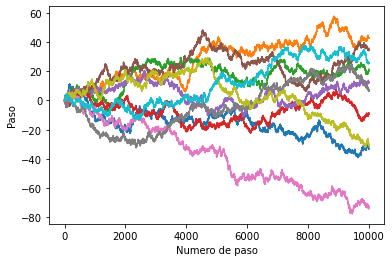

In [192]:
# Solución

fig, ax = plt.subplots()
x = np.arange(0, 10000, 1)
for i in range(10):
    y = RandomWalk(10000, 1)
    ax.plot(x, y)
    ax.set_xlabel('Numero de paso')
    ax.set_ylabel('Paso')
plt.show()

1.3. Grafique _x vs y_ para 10 caminatas aleatorias en 2D con N = 10, 1000 y 100 000 pasos (tres gráficos distintos). Mantenga la relación de aspecto (_aspect_ratio_) de los ejes igual a 1. **Valor: 1 punto.**

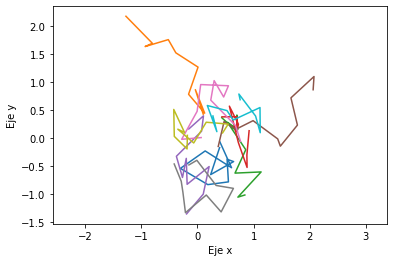

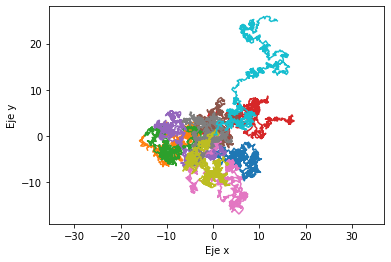

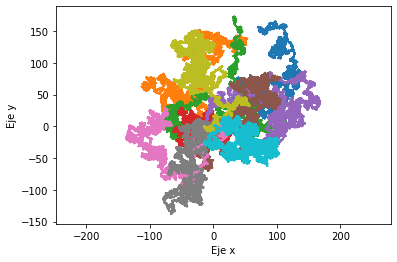

In [193]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

def separate2D(walk):
    xWalk = []
    yWalk = []
    for step in walk:
        xWalk += [step[0]]
        yWalk += [step[1]]
    return [xWalk, yWalk]


for i in range(10):
    walk10 = separate2D( RandomWalk(10, 2))
    walk1000 = separate2D(RandomWalk(1000, 2))
    walkBig = separate2D(RandomWalk(100000, 2))

    ax1.plot(walk10[0], walk10[1])
    ax1.axis('equal')
    ax2.axis('equal')
    ax3.axis('equal')
    ax1.set_xlabel('Eje x')
    ax1.set_ylabel('Eje y')
    ax2.set_xlabel('Eje x')
    ax2.set_ylabel('Eje y')
    ax3.set_xlabel('Eje x')
    ax3.set_ylabel('Eje y')
    ax2.plot(walk1000[0], walk1000[1])
    ax3.plot(walkBig[0], walkBig[1])

plt.show()




1.4. Si se multiplica el número de pasos por 100, ¿por cuánto aumenta la distancia neta recorrida por las caminatas? Justifique.

Sabemos que debido a la función pseudoaleatoria utilizada la partícula en una caminata aleatoria es igual de probable que se mueva a cualquier parte de forma independiente al paso anterior por lo que el termino de la distancia al cuadrado se puede calcular sin tomar en cuenta interacción entre terminos bidimensionales. De esta forma la ecuación de la distancia recorrida esperada para una caminata aleatoria de N pasos se simplifica a:

$R_{rms} = \sqrt{N}r_{rms}$

donde $r_{rms}$ es la raiz del tamaño de paso promedio esperado.

De esta forma al multiplicar por 100 el número de pasos es de esperar que la distancia neta recorrida aumente por la raiz cuadrada de 100 que sería 10.


2. Cada caminata aleatoria es diferente e impredecible pero el _ensamble_ de caminatas tiene propiedades elegantes y predecibles:

2.1. Escriba una rutina llamada ```EndPoints()``` que calcule la posición final de _nCaminatas_ caminatas aleatorias de _nPasos_ pasos en _nDim_ dimensiones.

In [194]:
# Base para la función Endpoints()

def Endpoints(nCaminatas, nPasos, nDim):
    finalPosition = []
    for i in range(nCaminatas):
        walk = RandomWalk(nPasos, nDim)
        lastStep = walk[-1]
        finalPosition += [lastStep]
    result = np.array(finalPosition)
    return result

2.2. Haga un gráfico de dispersión mostrando los puntos finales de 10 000 caminatas aleatorias con nPasos = 1 y 10 superpuestos en el mismo gráfico. **Valor: 1 punto.**

2.3. Comente cómo el gráfico obtenido es un ejemplo de _simetría emergente_ del ensamble de caminatas.

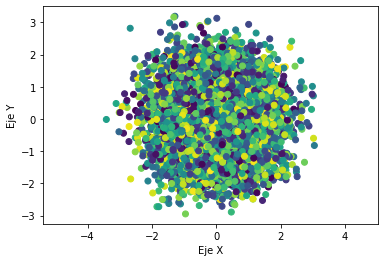

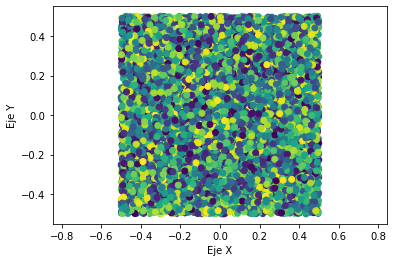

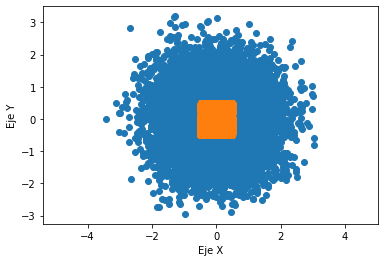

In [195]:
fig10, ax10 = plt.subplots()
fig1, ax1 = plt.subplots()
figCom, axCom = plt.subplots()


cam10 = separate2D(Endpoints(10000, 10, 2))
cam1 = separate2D(Endpoints(10000, 1, 2))

#Graficamos con un mapa de color aleatorio para mejorar apariencia del grafico
ax10.scatter(cam10[0], cam10[1], c=np.random.uniform(0, 50, 10000))
ax1.scatter(cam1[0], cam1[1], c=np.random.uniform(0, 2, 10000))
axCom.scatter(cam10[0], cam10[1])
axCom.scatter(cam1[0], cam1[1])
ax10.axis('equal')
ax1.axis('equal')
axCom.axis('equal')
ax1.set_xlabel('Eje X')
ax1.set_ylabel('Eje Y')
ax10.set_xlabel('Eje X')
ax10.set_ylabel('Eje Y')
axCom.set_xlabel('Eje X')
axCom.set_ylabel('Eje Y')
plt.show()

3. Las caminatas aleatorias cumplen el teorema del límite central. Las posiciones finales del ensamble de caminatas aleatorias de _N_ pasos en una dimensión, con longitud de paso raíz cuadrática media (rms) $r_{rms}$ siguen una distribución gaussiana conforme $N \rightarrow \infty$
$$
\rho(x) = \dfrac{1}{\sqrt{2\pi}\sigma}\exp{-x^2 \over 2\sigma^2}
$$

donde 
$$\sigma = \sqrt{N}r_{rms}$$
$$r_{rms} = \dfrac{R_{rms}}{\sqrt{N}}$$
$$R_{rms} = \sqrt{\langle R^2(N)\rangle}$$

3.1. Comente la interpretación física de las cantidades $r_{rms}$ y $R_{rms}$

Utilizando el libro de Landau como referencia podmeos darnos cuenta que $R_{rms}$ es el tamaño promedio de una caminata de N pasos donde su calculo puede ser calculado a partir de la raíz cuadrada de N y de $r_{rms}$.

$r_{rms}$ por otro lado es la raíz cuadrada de del cuadrado de el valor promedio esperado para el tamañp del paso. O puesto de otra forma:

$r_{rms} = \sqrt{<r^2>}$

Donde $<r> =$ la diferencia absoluta del intervalo del probabilidad

3.1. Calcule la distancia $R_{rms}$ para una _nCaminatas = 10 000_ en una dimensión con pasos aleatorios distribuidos en el intervalo (-1/2, 1/2). **Valor: 1 punto.**

En este caso el valor de r será 1 dado que la diferencia de ambos absoluta es 1, entonces por esto el valor de $R_{rms}$ sería igual a $\sqrt{N}$ entonces $R_{rms}=100$

3.2. Escriba una rutina que grafique un histograma de los puntos finales de _nCaminatas = 10 000_ en una dimensión. Genere histogramas para _nPasos = 1, 2, 3, 5, 10_ y 50 _bins_.

3.3. Sobre el mismo histograma, grafique la predicción dada por la distribución gaussiana $\rho(x)$ para _x_ entre $(-3\sigma, 3\sigma)$. **Valor: 2 puntos.**

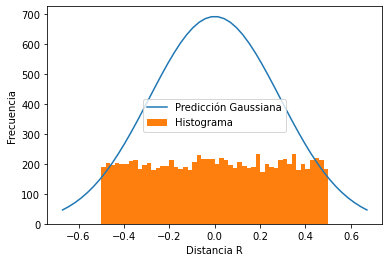

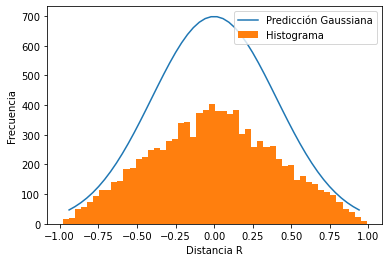

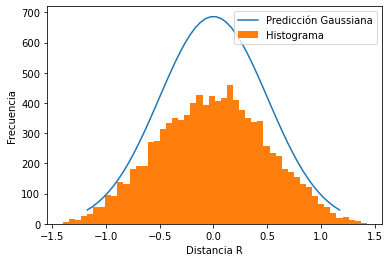

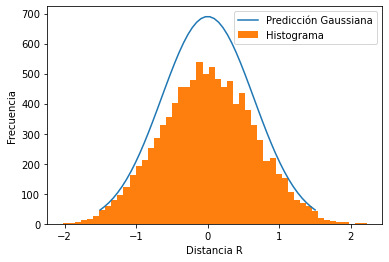

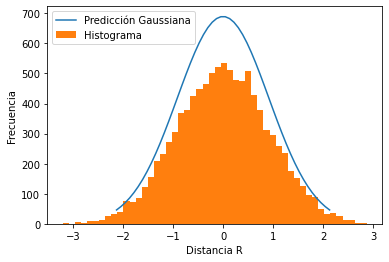

In [207]:
from scipy.stats import norm


def histograma(nPasos):
    '''
    genera un histograma para 10 000  caminatas basado en el numero de pasos con prediccion gaussiana
    :param nPasos: numero de pasos en cada caminata
    :return: graficos para valores solicitados
    '''
    walk = Endpoints(10000, nPasos, 1)
    #Desviacion estandar segun la ecuacion dada por el Landau
    des2=  (np.average(walk**2))**0.5
    #Generamos espacio en el eje X para poder graficar la funcion de probabilidad con los limites de -3des a 3des
    x = np.linspace(norm.ppf(0.01, scale=des2), norm.ppf(0.99, scale = des2), 50)
    yProb = norm.pdf(x, scale = des2)
    fig, ax = plt.subplots()
    ax.plot(x,   nPasos**0.5 / 2 *1000*yProb, label = 'Predicción Gaussiana')
    ax.hist(walk, bins=50, label = 'Histograma')
    ax.set_xlabel("Distancia R")
    ax.set_ylabel("Frecuencia")
    plt.legend()
    plt.show()

histograma(1)
histograma(2)
histograma(3)
histograma(5)
histograma(10)


3.4. ¿Para cuál número de pasos en el ensamble de caminatas la distribución gaussiana se vuelve una buena aproximación de la caminata aleatoria?

Notamos que para 1 paso existe la misma posibilidad de que el valor recorrido se encuentre entre -0.5 y 0.5, por lo qu sigue una distribución rectangular. Al convolucionar dos funciones rectangulares obtenemos una gráfica triangular como la segunda, la tercera sería una distribución trapezoidal y a partir de 5 pasos se puede afirmar que cumple el teorema de límite central y observamos como se ajusta bien la predicción Gaussiana.